Recommendation using User behavior(ratings).

In [1]:
import numpy as np
import pandas as pd

In [2]:
column_names = ["user_id","item_id","rating","timestamp"] #We give column names as the data does not have any names.
df = pd.read_csv("u.data",sep="\t",names=column_names) # '\t' --> Tab Seperated

In [3]:
df.head()
#item_id is the unique id for every movie.
# 1 user can provide ratings to different movies.

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
#Dataset which has the mapping information of item_id and title of the movie
movie_titles = pd.read_csv("Movie_Id_Titles")
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [5]:
df = pd.merge(df,movie_titles,on="item_id")
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


## Visualization Imports

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
%matplotlib inline

#### Data with average rating and number of ratings.

In [7]:
df.groupby("title")["rating"].mean().sort_values(ascending=False).head(20)

title
Marlene Dietrich: Shadow and Light (1996)                 5.000000
Prefontaine (1997)                                        5.000000
Santa with Muscles (1996)                                 5.000000
Star Kid (1997)                                           5.000000
Someone Else's America (1995)                             5.000000
Entertaining Angels: The Dorothy Day Story (1996)         5.000000
Saint of Fort Washington, The (1993)                      5.000000
Great Day in Harlem, A (1994)                             5.000000
They Made Me a Criminal (1939)                            5.000000
Aiqing wansui (1994)                                      5.000000
Pather Panchali (1955)                                    4.625000
Anna (1996)                                               4.500000
Everest (1998)                                            4.500000
Maya Lin: A Strong Clear Vision (1994)                    4.500000
Some Mother's Son (1996)                                

The above information may not be accurate as say for movie 'Marlene Dietrich: Shadow and Light (1996)', only 1 or 2 user has given the rating of 5. So we are getting the average as 5. 

Thus it is important to first find out how many total number of times, a movie has been rated. Then we can get an accurate average rating for the movie.

#### To find out how many times ratings have been given to the movies.

In [8]:
df.groupby("title")["rating"].count().sort_values(ascending=False).head(20)

title
Star Wars (1977)                    584
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     368
Star Trek: First Contact (1996)     365
Name: rating, dtype: int64

In [9]:
df.groupby("title")["rating"].count().sort_values(ascending=True).head(30)

title
Á köldum klaka (Cold Fever) (1994)                   1
Mille bolle blu (1993)                               1
Mat' i syn (1997)                                    1
Marlene Dietrich: Shadow and Light (1996)            1
Man from Down Under, The (1943)                      1
Mamma Roma (1962)                                    1
Mad Dog Time (1996)                                  1
Big Bang Theory, The (1994)                          1
MURDER and murder (1996)                             1
Coldblooded (1995)                                   1
Low Life, The (1994)                                 1
Love Is All There Is (1996)                          1
Lotto Land (1995)                                    1
Bird of Prey (1996)                                  1
Liebelei (1933)                                      1
Leopard Son, The (1996)                              1
Lashou shentan (1992)                                1
Land and Freedom (Tierra y libertad) (1995)          1
Lady

#### Creating a DataFrame with average rating and number of ratings.

In [10]:
ratings = pd.DataFrame(df.groupby("title")["rating"].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


#### We even add the total number of ratings have been given to the every movies(count) to the 'ratings' dataframe.

In [11]:
ratings["number_of_ratings"] = pd.DataFrame(df.groupby("title")["rating"].count())
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### Plotting Histogram w.r.t the 'number_of_ ratings'.

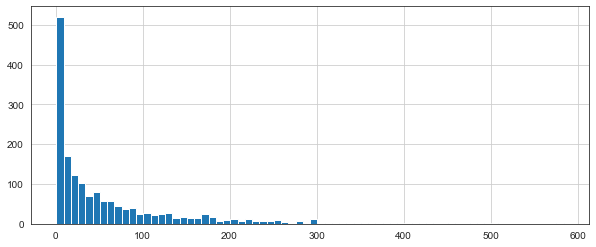

In [12]:
plt.figure(figsize=(10,4))
ratings["number_of_ratings"].hist(bins=70)

#### Plotting Histogram w.r.t 'rating'.

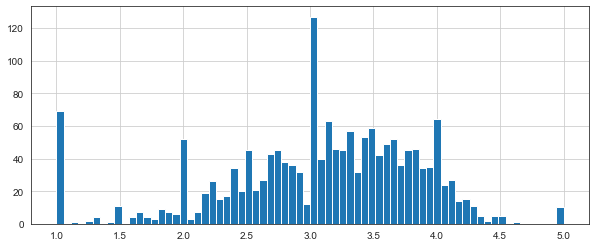

In [13]:
plt.figure(figsize=(10,4))
ratings["rating"].hist(bins=70)

#### Plotting a jointplot for 'rating' and 'number_of_rating'.

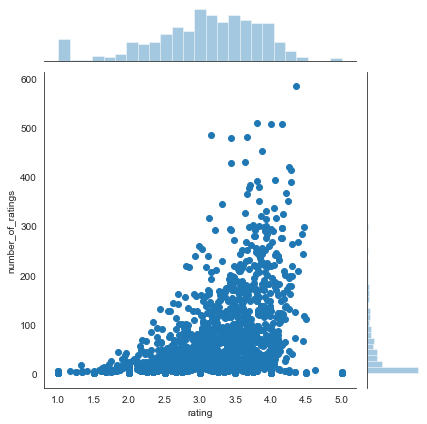

In [14]:
sns.jointplot(x = "rating", y = "number_of_ratings",data = ratings)

Wherever the points are densed, more number of ratings have been given.

## Recommending Similar Movies using Correlation.

We create a pivot table which has 'user_id' as Index and the 'title' (movie title) as columns. Each cell will then consist of ratings given by the user to that particular movie. The data may have many 'NaN' values as the users may not have given ratings to all the movies.

In [15]:
movie_matrix = df.pivot_table(index="user_id",columns="title",values="rating")
movie_matrix.head(10)

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN
6,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,5.0,5.0,NaN,4.0,...,NaN,NaN,NaN,5.0,3.0,NaN,3.0,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Sorting the 'ratings' dataframe with 'number_of_ratings'.

In [16]:
ratings.sort_values("number_of_ratings",ascending=False).head(20)

,rating,number_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


We now try to find out the correlation between the movies on the basis of ratings. We use the 'movie_matrix' dataframe created above.

We take 2 movies :- 1) Star Wars(1977) --> A Sci-fi movie. 2) Liar Liar(1997) --> A comedy movie. 

In [17]:
ratings.head()

,rating,number_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


#### On the basis of above dataframe, we will take the user ratings for the movies 'Star Wars'.

In [18]:
starwars_user_ratings = movie_matrix["Star Wars (1977)"]
print(starwars_user_ratings.head())

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64


#### We use corrwith() method to get correlations between two pandas series.

In [19]:
similar_starwars = movie_matrix.corrwith(starwars_user_ratings)

C:\Users\Dharmil\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Dharmil\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


### We now create a dataframe with movies correlated with 'Star Wars (1977)'.

In [20]:
corr_starwars = pd.DataFrame(similar_starwars,columns=["Correlation"])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


The above dataframe means that if someone has watched 'Star Wars', the next movie which will be recommended is ''Til There Was You (1997)' because it has the highest correlation of 0.872872.

In the above df, some of the ratings might not make sense. This is because there are lot of movies only watched once by the users who have also watched 'Star Wars' (Most Popular Movie).

#### Therefore, we will use only those movies who have 'number_of_ratings' > 100.

In [21]:
corr_starwars.sort_values("Correlation",ascending=False).head(10)

,Correlation
title,
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Good Man in Africa, A (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


These movies are perfectly correlated with 'Star Wars'. However this may not be accurate.

#### We filter the movies that have less than 100 reviews ('100' is chosen based on the histogram above).

In [22]:
corr_starwars = corr_starwars.join(ratings["number_of_ratings"])
corr_starwars.head()

,Correlation,number_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Sorting the above based on the number of correlation.

In [23]:
corr_starwars[corr_starwars["number_of_ratings"]>100].sort_values("Correlation",ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


### We take another movie - 'Liar Liar' --> A comedy movie.

In [24]:
liarliar_user_ratings = movie_matrix["Liar Liar (1997)"]
similar_liarliar = movie_matrix.corrwith(liarliar_user_ratings)

C:\Users\Dharmil\anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\Dharmil\anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [26]:
corr_liarliar = pd.DataFrame(similar_liarliar,columns=["Correlation"])
corr_liarliar.dropna(inplace=True)
corr_liarliar = corr_liarliar.join(ratings["number_of_ratings"])
corr_liarliar[corr_liarliar["number_of_ratings"]>100].sort_values("Correlation",ascending=False).head(10)

,Correlation,number_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
Pretty Woman (1990),0.469790,164
101 Dalmatians (1996),0.469765,109
Michael (1996),0.442022,119
Waterworld (1995),0.438405,102
